# TkEasyGUIでデスクトップアプリを作成する  
2024.6.9 HAI技術士事務所  

TKEasyGUIはGUIを作成するためのライブラリです。  
他のTkinterやPyQt等に比べ、class定義等がなく書きやすいことが特徴です。      
GUIを作成するPySimpleGUIというライブラリ（有料）とほぼ互換性があるため、  
PySimpleGUIのHPにあるcookbookの事例も参考になります。    

設置できるウィジェット（テキストボックスやボタン等）の種類や設定方法はGitHubのwidgets-py.mdを参照して下さい。   
https://github.com/kujirahand/tkeasygui-python/blob/main/docs/TkEasyGUI/widgets-py.md

### PySimpleGUIと書き方が違う箇所メモ  
・fontの設定が font = 'Meyrio 14' → ('Meyrio', 14)  
・Update が update  
・buttonにオリジナル画像を割り当てられない  
・imageウィジェットでサイズを指定しないと正方形になる。    
・InputTextの引数にsizeがない、fontsizeで自動調整。  
・初期設定にあるボタンがない。Submit, cancelボタンなど。sg.Button('Submit')で書く。  
・FileBrowseの引数がtargetからtarget_keyに変わっている。  
・Frame枠の指定がrelief=sg.**だったのがrelief = 'groove'の書き方に変わった。他には'raised', 'groove', 'sunken', 'ridge', 'flat','solid'  
・WindowメソッドにFinalizeがない。

## １．基本的なウィジェットを配置する

### １．ウィンドウとボタンを配置する

In [ ]:
# sample01 window1

import TkEasyGUI as eg

# ウィジェットの定義 --------------------------------------------
txt = eg.Text('Window Sample 01')
Button = eg.Button('Quit')

# レイアウトの定義 ----------------------------------------------
layout = [[txt],
          [Button]]

window = eg.Window('Sample01', layout, size=(400,100))

# ループ 処理----------------------------------------------------
while True:
    event, value = window.read()

    if event in ('Quit', eg.WIN_CLOSED):   # Quitボタン または 右上の × を押すとウィンドウが閉じる
        window.close()
        break
        

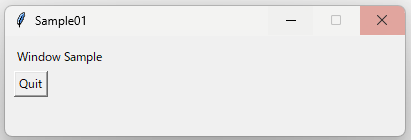

In [ ]:
# sample02 window2

import TkEasyGUI as eg

txt = eg.Text('Window Sample 02')
button = eg.Button('Quit',size=(10,3))

layout = [[txt, button]]

window = eg.Window('Sample02', layout, size=(300,100), resizable=True, location=(100,100))

while True:
    event,values = window.read()
    
    if event in ('Quit', eg.WIN_CLOSED):
        window.close()
        break

解説：  
・Buttonの引数にsizeを追加してボタンサイズを変えている。  
・layoutのリスト配列を変えて、縦並びから横並びに変えている。  
・Windowの引数にresizable=Trueにしてウィンドウサイズが変更出来るようにしている。  
　またlocationで表示する場所を設定している。  

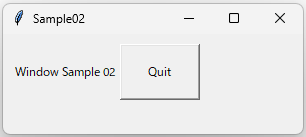

In [ ]:
# sample03 window3

import TkEasyGUI as eg

txt = eg.Text('Window Sample 03', font=('Meyrio', 40))
button = eg.Button('Quit', font=('Meyrio', 40), size=(5,5))

layout = [[txt],
          [button]]

window = eg.Window('Sample03', layout, resizable=True)
window.maximize()

while True:
    event,values = window.read()
    
    if event in ('Quit', eg.WIN_CLOSED):
        window.close()
        break

解説：  
・テキスト、ボタンにフォントとサイズを設定している。  
・ウィンドウが開いた時に画面いっぱいになるように設定している。

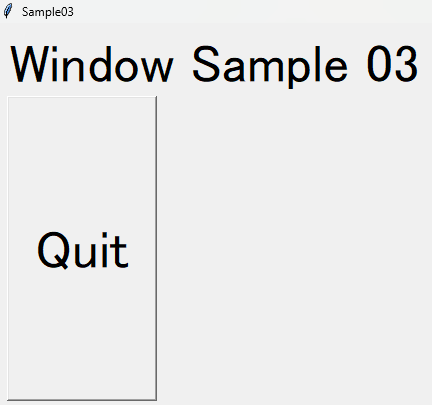

### ２．Frameを用いてウィジェットを配置する

In [ ]:
# sample04 frameを用いてウィジェットを配置する。

import TkEasyGUI as eg

button1 = eg.Button('A')
button2 = eg.Button('B')
button3 = eg.Button('C')
button4 = eg.Button('D')

frame1 = eg.Frame('Frame1', [[button1, button2]])
frame2 = eg.Frame('Frame2', [[button3, button4]])

layout = [[frame1, frame2]]

window = eg.Window('Sample04', layout, size=(250,100))

while True:
    event,values = window.read()

    if event == eg.WIN_CLOSED:
        window.close()
        break

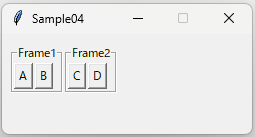

### 3. Keyの使い方  
ウィジェットの動作を記述するために、各ウィジェットにKeyを設定します。

In [ ]:
# sample05 keyを設定して利用する。Input:に文字を入力してOKを押すとOutput:に同じ文字が書きだされる。

import TkEasyGUI as eg

txt1 = eg.Text('Input:')
input_txt = eg.InputText('', key='input')
txt2 = eg.Text('Output:')
output_txt = eg.Multiline('', key='output')
button1 = eg.Button('OK')
button2 = eg.Button('Clear')
button3 = eg.Button('Quit')

layout = [[txt1],
          [input_txt],
          [txt2],
          [output_txt],
          [button1, button2, button3]]

window = eg.Window('Sample05', layout)

while True:
    event,values = window.read()

    if event=='OK':
        window['output'].print(values['input'])
        
    if event == 'Clear':
        window['output'].update('')

    if event in ('Quit', eg.WIN_CLOSED):
        window.close()
        break

解説：  
・ボタンにはkeyを指定せず、event=='OK'などボタン名で条件が記述出来ます。  

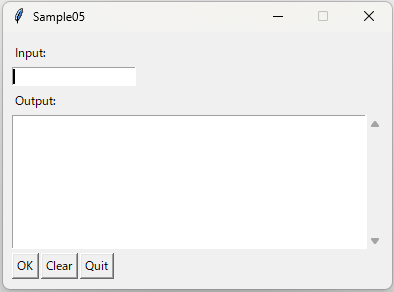

### 4. Sliderの使い方

In [ ]:
import TkEasyGUI as eg

txt1 = eg.Text('Slider :')
slider = eg.Slider(range=(1,255), default_value=1, resolution=1, enable_events=True, size=(255,2), key='slider')
txt2 = eg.Text('', key='data')

layout = [[txt1, slider],
          [txt2]]

window = eg.Window('Sample06', layout, size=(500,100))

while True:
    event, values = window.read()

    if event == 'slider':
        window['data'].update(int(values['slider']))

    if event == eg.WIN_CLOSED:
        window.close()
        break


解説：  
・スライダーの引数で、レンジ、解像度を指定。enable_events=Trueにしていないとリアルタイムに調整出来ないので指定は必須です。

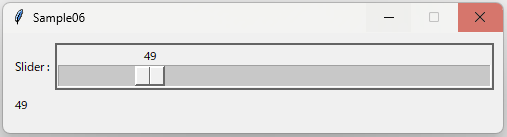

### ５．RadioButtonの使い方

In [ ]:
import TkEasyGUI as eg

radio_a = eg.Radio('a', group_id='0', key='radio_a')
radio_b = eg.Radio('b', group_id='0', key='radio_b')
radio_c = eg.Radio('c', group_id='0', key='radio_c')

txt = eg.Text('', key='txt') 

layout = [[radio_a, radio_b, radio_c],
          [txt]]
      
window = eg.Window('Sample07', layout, size=(500,80))

while True:

    event,values = window.read()
    
    if values['radio_a']:
        window['txt'].update('a が選択されています')
        
    if values['radio_b']:
        window['txt'].update('b が選択されています')

    if values['radio_c']:
        window['txt'].update('c が選択されています')
    
    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・ラジオボタンはgroup_id が同じもの同士でどれか一つ選択されるようになる。  

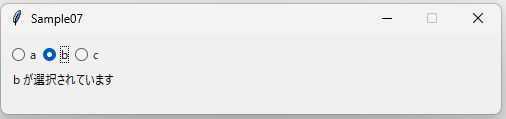

### 6. ComboBoxの使い方

In [ ]:
import TkEasyGUI as eg

parts_list = ['11111', '22222', '33333']

combo = eg.Combo(values=parts_list, default_value='part_list', enable_events=True, key='combo')
txt = eg.Text('未選択',key='txt')

layout = [[combo],
          [txt]]

window = eg.Window('Sample08', layout,size=(400,200), font=('meyrio', 18))

while True:
    event, values = window.read()
 
    if event == 'combo':
        window['txt'].update(values['combo'])

    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・comboの引数にenabale_event=Trueを入れれば、コンボボックスの値を変更したと同時にイベントが起こる。

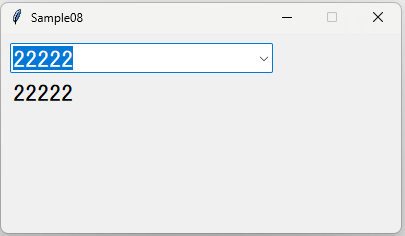

### ７．時刻の表示  
window.read(timeout=20)のtimeoutは**「特に何もインプットがなくても情報を更新する」**の意味です。

In [ ]:
import TkEasyGUI as eg
from datetime import datetime

txt = eg.Text('',key='txt')

layout = [[txt]]

window = eg.Window('Sample09', layout,size=(400,100), font=('meyrio', 20))

while True:
    event, values = window.read(timeout=20)    # timeoutは何も操作しなくても情報を更新する
    
    txt = '{0:%Y.%m.%d %H：%M：%S}'.format(datetime.now())
    window['txt'].update(txt)

    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・window.read(timeout=20)でtimeoutを設定することで、ボタンを押すなどの操作することなくwindowの情報を更新する。  
・時刻は常に更新が必要なのでtimeoutの設定をしないと動かない。

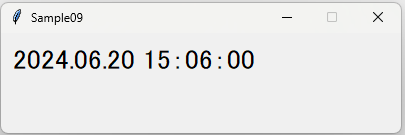

### ８. Imageによる画像の表示

In [6]:
import TkEasyGUI as eg
import cv2

img = cv2.imread('image.jpg')
imgbytes = cv2.imencode('.png', img)[1].tobytes()   #pngに変換

image = eg.Image(data=imgbytes, size=(650,500))

layout = [[image]]

window = eg.Window('Sample10', layout)

while True:
    event,values = window.read()

    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・OpenCVで画像を読み込み表示しています。  
・Imageの引数でサイズを指定しないと、自動で正方形に調整されるようです。

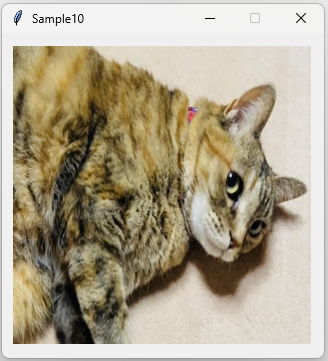

### ９. OpenCVで取得した動画の表示  

In [ ]:
import cv2
import TkEasyGUI as eg

cap = cv2.VideoCapture(0)
h, w = cap.get(3), cap.get(4)    # 画像サイズを取得する
 
image = eg.Image(filename='', size=(h,w), key='image')

layout = [[image]]

window = eg.Window('Sample11', layout)

while True:
    event,values = window.read(timeout=20)    # timeoutは何も操作しなくても情報を更新する

    ret,frame = cap.read()
    
    imgbytes = cv2.imencode('.png', frame)[1].tobytes()     # png形式に変換 
    window['image'].update(data=imgbytes)

    if event == eg.WIN_CLOSED:
        window.close()
        break

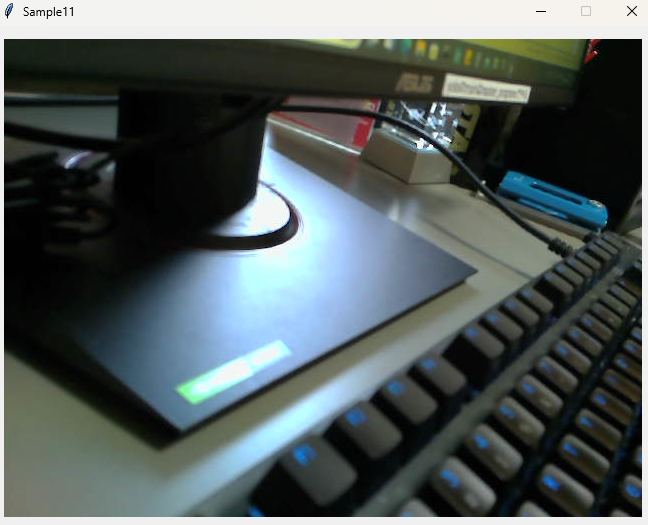

### １０. リストの内包表記を用いたウィジェットの配置  

In [ ]:
import TkEasyGUI as eg

button_name = ['1','2','3','4','5','6','7','8']

buttons = [eg.Button(button_name[i], size=(5,3), key=button_name[i]) for i in range(len(button_name))]     # 内包表記

layout = [buttons]       # buttonsがもともとリストなので[[buttons]]ではなく[buttons]

window = eg.Window('Sample12', layout)

while True:
    event,values = window.read()

    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・ボタン等が多数の場合はリストの内包表記で配置出来ます。  

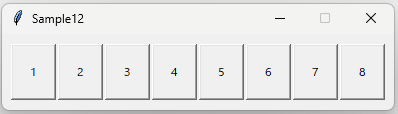

### １１．オルタネイトボタン  
ボタンを押した後、ONの状態をキープし、もう一度押すとOFFになります。

In [ ]:
import TkEasyGUI as eg

button = eg.Button('OFF', size=(10,5), background_color="#FF3838", key='button')

layout = [[button]]

window = eg.Window('Sample13', layout, font=('meyrio', 30))

button_state = 0      # 0:OFF, 1:ON

while True:
    event,values = window.read()
    
    if event == 'button':
        
        if button_state == 0:
            window['button'].update(text='ON', background_color="#48F90A")
            button_state = 1
            
        else:
            window['button'].update(text='OFF', background_color="#FF3838")
            button_state = 0
    
    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・ボタンの背景色を指定する場合はHEXの文字列で指定します。  
・ボタンを押すたびにbutton_stateを0と1で入れ替え表示を変更しています。

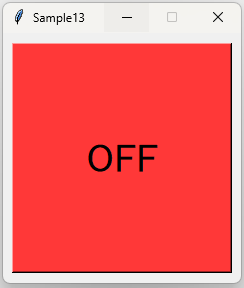

### １２．モーメンタリボタン  
ボタンを押している間だけONし、離すとOFFになります。

In [ ]:
import TkEasyGUI as eg

txt = eg.Text('0', key='txt1')
button1 = eg.Button('ON')
button2 = eg.Button('Clear')

layout = [[txt],
          [button1, button2]]

window = eg.Window('Sample14', layout,size=(400,200), font=('meyrio',30), finalize=True)     #finalizeしないと情報が更新されない
window['ON'].Widget.configure(repeatdelay=50, repeatinterval=50)       #ループ中にボタン状態を繰り返し出力する

n = 0

while True:
    event,values = window.read()
    
    if event == 'ON':
        window['txt1'].update(str(n))
        n += 1

    if event == 'Clear':
        window['txt1'].update('0')
        n = 0
        
    if event == eg.WIN_CLOSED:
        window.close()
        break

解説：  
・ONボタンを押している間だけ数字がカウントアップし、Clearボタンを押すと数字が0に戻る。  
・windowの設定がかなり特殊なのでコピーして使って下さい。  
・一部タッチパネルでは「押しっぱなし」に対応していない場合があります。

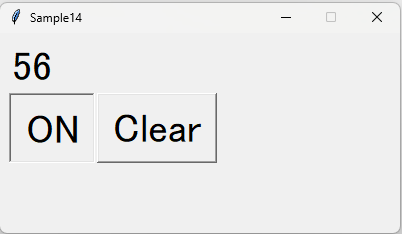

## ２．練習問題  
・Webカメラから画像を取り込み、OpenCVで二値化処理を行い元画像と並べてウィンドウ上に表示する。  
・スライダーで二値化のしきい値を1～255で調整出来るようにする。  
・スライダーで設定した値はテキストボックスに表示する。  
・以下の二値化の基本プログラムにTkEsayGUIのコードを追記して製作して下さい。

In [ ]:
# 二値化基本プログラム 

import cv2

cap = cv2.VideoCapture(0)
threshold = 100

while True:
    ret, frame = cap.read()
    img_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)

    cv2.imshow('binary_image', img_thresh)

    if cv2.waitKey(1)==27:
        cv2.destroyWindow(window_titles[n])
        cap.release()
        break

完成プログラム例：

In [ ]:
import cv2
import TkEasyGUI as eg

cap = cv2.VideoCapture(0)
h, w = cap.get(3), cap.get(4)    # 画像サイズを取得する

# GUIの設定 ----------------------------------------------------------------
txt1 = eg.Text('Original image : ', size=(20,1))
txt2 = eg.Text('Binaly image : ', size=(20,1))
image1 = eg.Image('', size=(h,w), key='image1')
image2 = eg.Image('', size=(h,w), key='image2')
slider = eg.Slider(range=(0,255), 
                   default_value=threshold, 
                   resolution=1, size=(50, 5), 
                   enable_events=True, 
                   key='slider')
txt3 = eg.Text('threshold = ', size=(20,1))
txt4 = eg.Text('', size=(20,1), key='txt4')

frame1 = eg.Frame('', [[txt1],[image1]])
frame2 = eg.Frame('', [[txt2],[image2]])
frame3 = eg.Frame('', [[txt3,txt4,slider]], relief = 'flat')

layout = [[frame1, frame2],
          [frame3]]

window = eg.Window('Binary Image', layout)

# roop -------------------------------------------------------------------------
cap = cv2.VideoCapture(0)
threshold = 100

while True:
    event,values = window.read(timeout=20)
    
    ret,frame = cap.read()
    img_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)

    imgbytes1 = cv2.imencode('.png', frame)[1].tobytes()
    imgbytes2 = cv2.imencode('.png', img_thresh)[1].tobytes()
    
    window['image1'].update(data=imgbytes1) 
    window['image2'].update(data=imgbytes2)

    if event=='slider':
        threshold = int(values['slider'])
        window['txt4'].update(threshold)
        
    if event == eg.WIN_CLOSED:
        cap.release()
        cv2.destroyAllWindows()
        window.close()        
        break


完成例：  
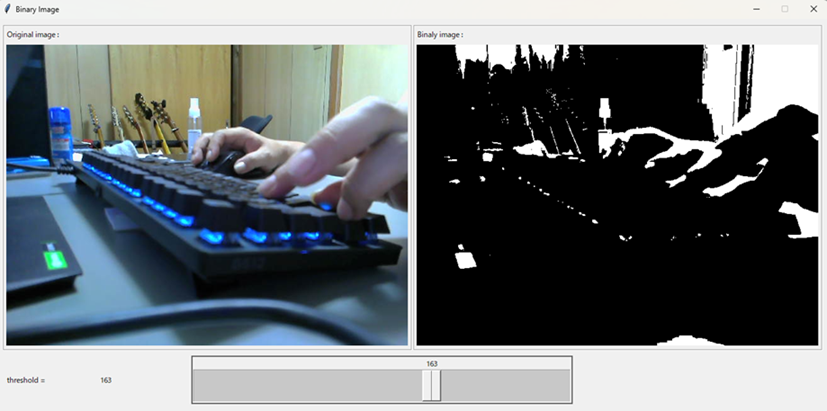